<h1>Brand Slogans Notebook #5<span class="tocSkip"></span></h1>

In this notebook I extract the ISO codes of the countries from the dataset for the purpose of creating maps.
The maps used for the final presetnation were created in Tableau and the notebook contains only some exemplary maps, the data preparation and values extraction.

The tableau map can be found here:
- https://public.tableau.com/profile/agnieszka2824#!/vizhome/GenderAnalysis-BrandSlogans/GenderAnalysis?publish=yes

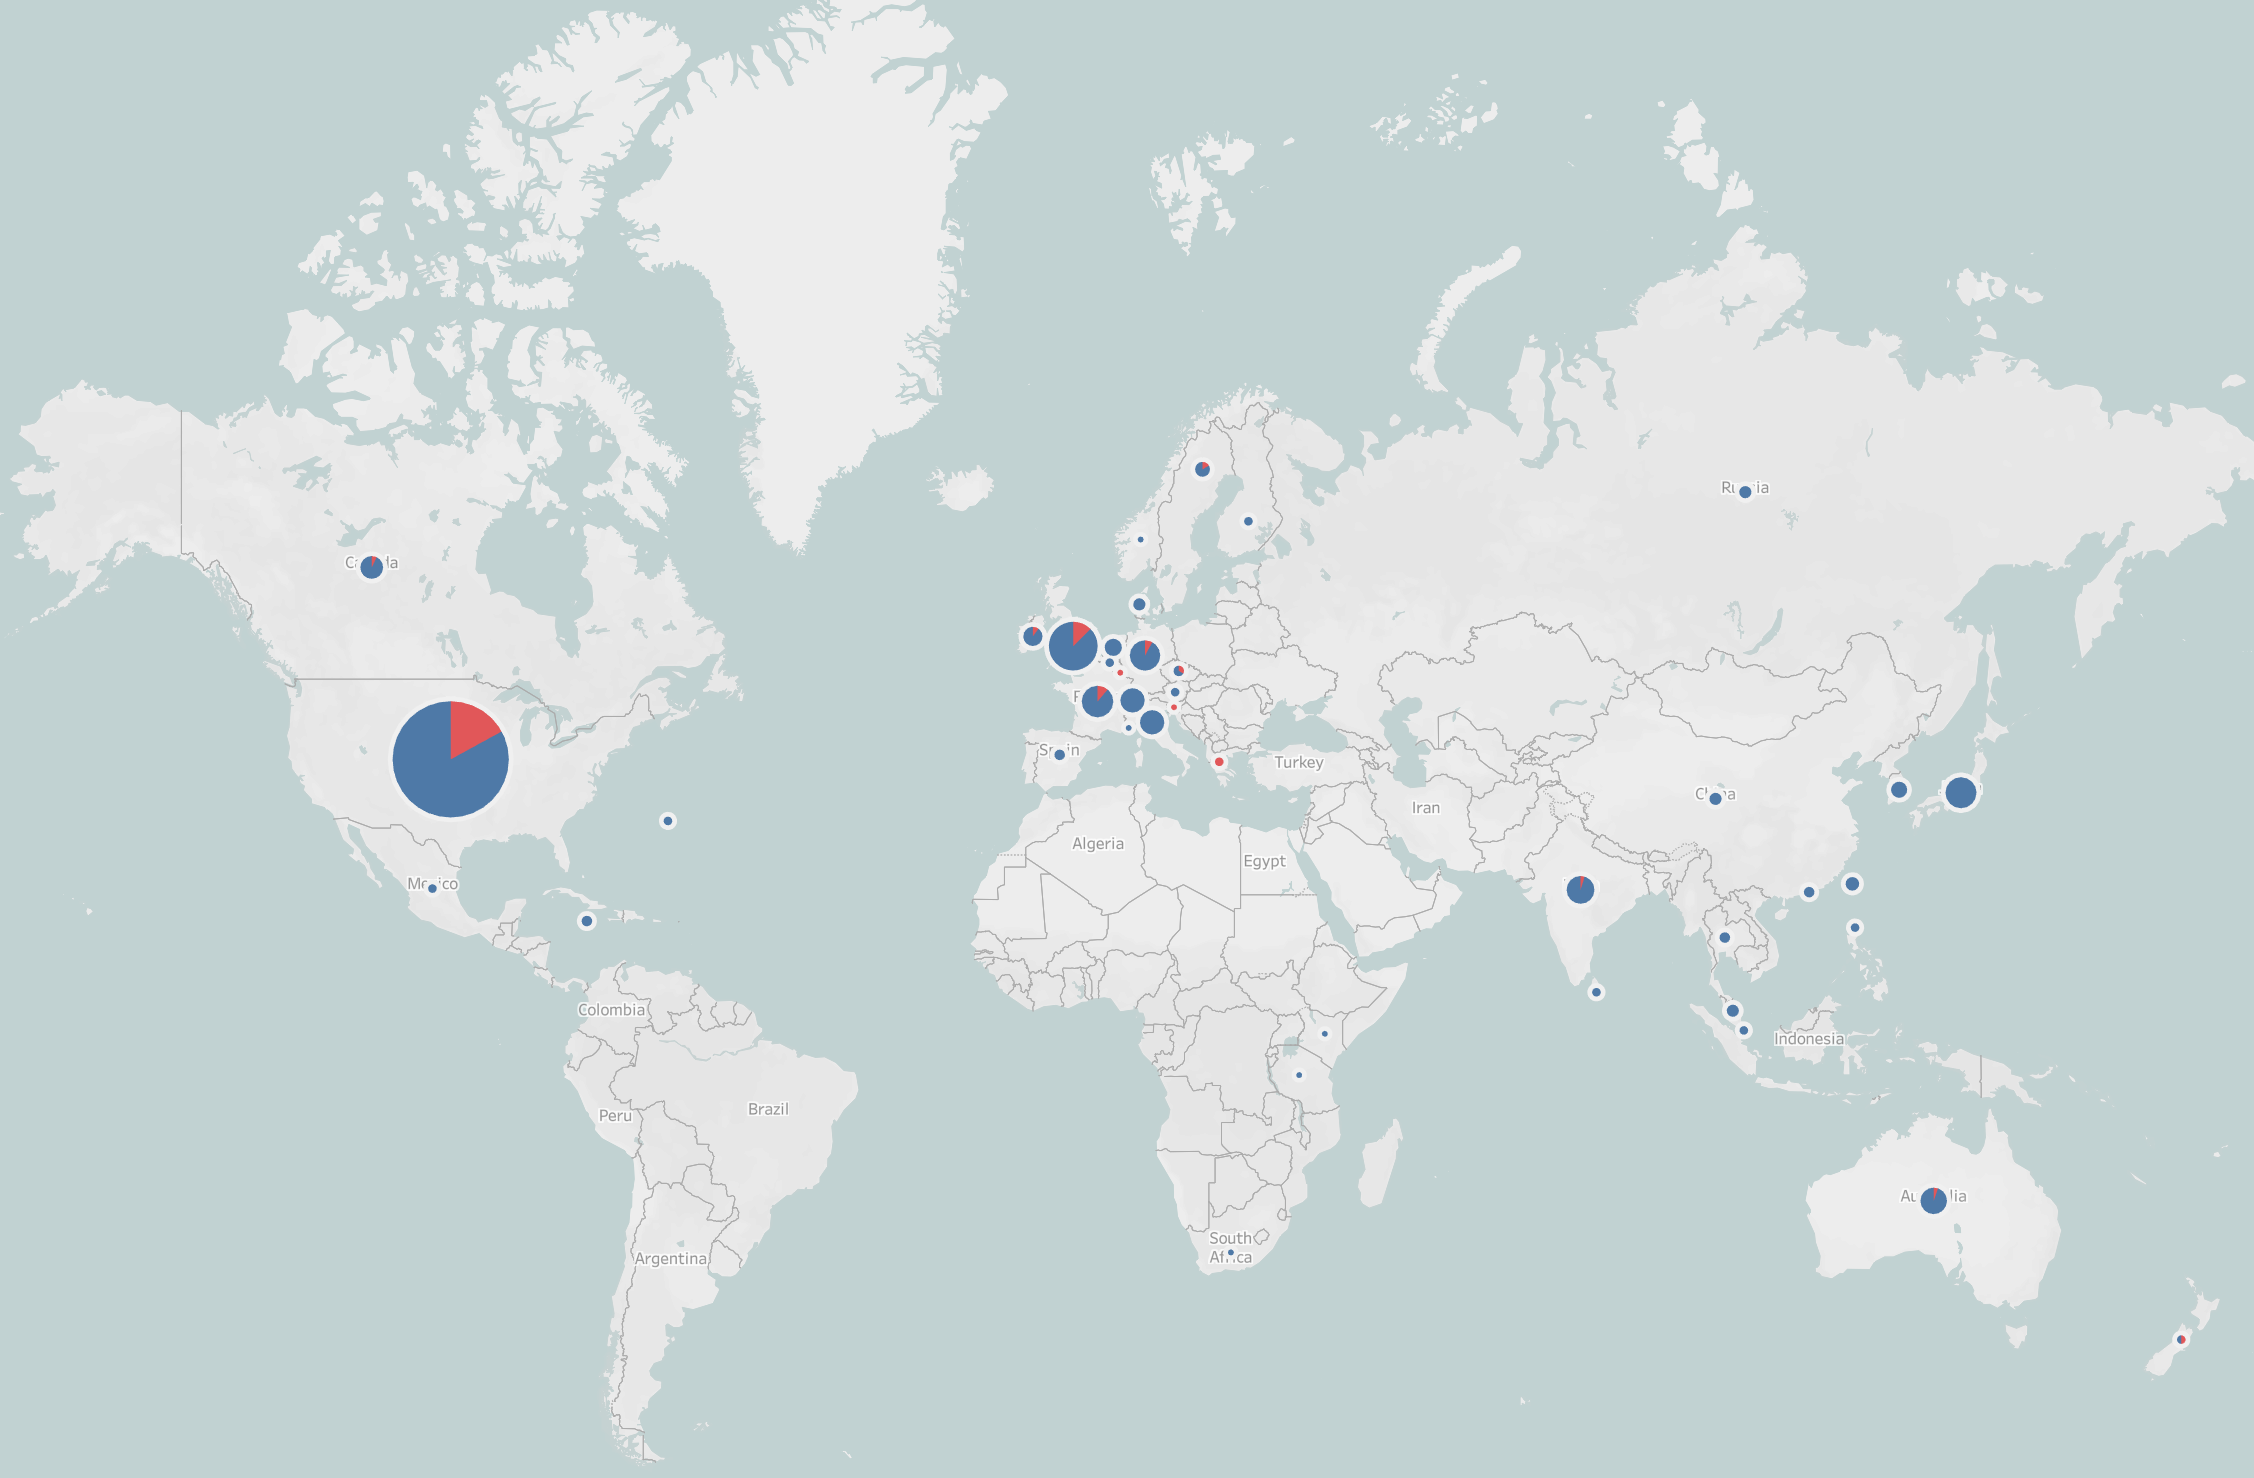


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-libraries-and-the-dataset" data-toc-modified-id="Importing-the-libraries-and-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the libraries and the dataset</a></span></li><li><span><a href="#Maps" data-toc-modified-id="Maps-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Maps</a></span><ul class="toc-item"><li><span><a href="#Asiginign-ISO(3)-to-the-countries-in-the-dataset" data-toc-modified-id="Asiginign-ISO(3)-to-the-countries-in-the-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Asiginign ISO(3) to the countries in the dataset</a></span></li><li><span><a href="#Plotting-maps" data-toc-modified-id="Plotting-maps-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plotting maps</a></span></li></ul></li><li><span><a href="#Gender-analysis" data-toc-modified-id="Gender-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gender analysis</a></span><ul class="toc-item"><li><span><a href="#Gender-distribution-by-country---plot" data-toc-modified-id="Gender-distribution-by-country---plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gender distribution by country - plot</a></span></li><li><span><a href="#Gender-by-category" data-toc-modified-id="Gender-by-category-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gender by category</a></span></li></ul></li></ul></div>

# Import the libraries and the dataset

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import math

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import matplotlib.pylab as pylab
import missingno as msno

import warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
plt.rcParams['figure.dpi'] = 300

import base64
import os

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from PIL import Image


# Other imports
from collections import Counter
import requests
import imageio
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS

from nltk.stem import WordNetLemmatizer

import en_core_web_sm
nlp = en_core_web_sm.load()


from nltk.corpus import stopwords, wordnet

from nltk.probability import FreqDist


import sys

sys.path.insert(0, '/Users/agieen/Downloads/AllWomen/_functions_')

from Functions_data_preprocessing_NLP import *
from fx_NLP import *

In [6]:
#import ceo:

data = pd.read_csv('/Users/agieen/Downloads/AllWomen/_Final_Project/notebooks/dataset_sloganswithgender.csv', delimiter=',', index_col=0)
data.head()



,brand,slogan,country,continent,category,sub_cat,executive,gender
0,Audi,Never Follow.\nKeeping ahead through technolog...,Germany,Europe,Automotive,NaN,Markus Duesmann,male
1,Apple,Byte into an Apple. (Late 1970s)\nSimplicity i...,USA,North America,Technology and Tech Services,NaN,Tim Cook,male
2,American Airlines,The new American is arriving.\nBe yourself. No...,USA,North America,Airline,NaN,Doug Parker,male
3,Avon,"The company for women.\nWe make it easy, You m...",UK,Europe,Cosmetics and self-care,NaN,Angela Cretu,female
4,Accenture,"High Performance, Delivered.\nGo on, be a Tige...",Ireland,Europe,Technology and Tech Services,NaN,Julie Sweet,female


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 780
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   brand      686 non-null    object
 1   slogan     686 non-null    object
 2   country    686 non-null    object
 3   continent  686 non-null    object
 4   category   686 non-null    object
 5   sub_cat    125 non-null    object
 6   executive  686 non-null    object
 7   gender     686 non-null    object
dtypes: object(8)
memory usage: 48.2+ KB


# Maps

## Asign ISO(3) to the countries in the dataset

In [23]:
#!pip install geopandas


In [13]:
import geopandas as gpd
shapefile = '/Users/agieen/Downloads/AllWomen/_Final_Project/datasets/Maps/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
# dropping the row for ‘Antarctica’ as it unnecessarily occupies a large space 


print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

        country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [16]:
data.head()

,brand,slogan,country,continent,category,sub_cat,executive,gender
0,Audi,Never Follow.\nKeeping ahead through technolog...,Germany,Europe,Automotive,NaN,Markus Duesmann,male
1,Apple,Byte into an Apple. (Late 1970s)\nSimplicity i...,USA,North America,Technology and Tech Services,NaN,Tim Cook,male
2,American Airlines,The new American is arriving.\nBe yourself. No...,USA,North America,Airline,NaN,Doug Parker,male
3,Avon,"The company for women.\nWe make it easy, You m...",UK,Europe,Cosmetics and self-care,NaN,Angela Cretu,female
4,Accenture,"High Performance, Delivered.\nGo on, be a Tige...",Ireland,Europe,Technology and Tech Services,NaN,Julie Sweet,female


In [17]:
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
    except Exception:
        return np.nan
    else:
        return result[0].alpha_3

In [20]:
import pycountry

iso_map = {country: do_fuzzy_search(country) for country in data["country"].unique()}
data["country_code"] = data["country"].map(iso_map)


In [22]:
data.country_code.unique()

array(['DEU', 'USA', 'UKR', 'IRL', 'MYS', 'NZL', 'TWN', 'ITA', 'SWE',
       'CAN', 'IND', 'ESP', 'JPN', 'FRA', 'NLD', 'JAM', 'AUS', 'AUT',
       'RUS', 'CZE', 'TZA', 'BMU', 'PHL', 'LKA', 'THA', 'DNK', 'HKG',
       'CHE', 'GRC', 'BEL', 'MEX', 'SVN', nan, 'CHN', 'NOR', 'KEN', 'FIN',
       'ZAF', 'SGP', 'MCO', 'LUX'], dtype=object)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         686 non-null    object
 1   slogan        686 non-null    object
 2   country       686 non-null    object
 3   continent     686 non-null    object
 4   category      686 non-null    object
 5   sub_cat       125 non-null    object
 6   executive     686 non-null    object
 7   gender        686 non-null    object
 8   country_code  679 non-null    object
dtypes: object(9)
memory usage: 53.6+ KB


In [24]:
#Checking the NaN values in ISO:

data[data['country_code'].isna()]


,brand,slogan,country,continent,category,sub_cat,executive,gender,country_code
322,Hyundai,Drive your way.\nDriving is believing.\nPrepar...,South Korea,Asia,Automotive,NaN,Chung Eui-sun,male,NaN
339,Hankook Tire,Hankook. Driving emotion.\nMake love to the ro...,South Korea,Asia,Automotive,Car parts,Hyun Bum Cho,male,NaN
379,Kia Motors,The power to surprise.\nMake every mile count....,South Korea,Asia,Automotive,NaN,SeungKyu Yoon,male,NaN
395,Kumho Tire,Kumho. Let's go.\nRace proven performance.\nGe...,South Korea,Asia,Automotive,Car parts,Jeon Dae-jin,male,NaN
414,LG,We put people first. (1997–1999)\nLG，Future's ...,South Korea,Asia,Technology and Tech Services,NaN,Koo Kwang-mo,male,NaN
505,Nexen Tire,Driving tomorrow.\nDriving a better tomorrow.\...,South Korea,Asia,Automotive,Car parts,Ho Chan Kang,male,NaN
588,Samsung,Samsung For Today and Tomorrow. ( 1993–2002 )...,South Korea,Asia,Technology and Tech Services,NaN,Oh-Hyun Kwon,male,NaN


In [25]:
# We need to assign KOR to South Korea and change the UK from UKR to GBR

#df = data.copy()

In [26]:
data.loc[(data.country_code == 'UKR'), 'country_code'] = 'GBP'

data['country_code'].fillna('KOR', inplace = True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         686 non-null    object
 1   slogan        686 non-null    object
 2   country       686 non-null    object
 3   continent     686 non-null    object
 4   category      686 non-null    object
 5   sub_cat       125 non-null    object
 6   executive     686 non-null    object
 7   gender        686 non-null    object
 8   country_code  686 non-null    object
dtypes: object(9)
memory usage: 53.6+ KB


In [35]:
#!pip install bokeh


In [28]:
#merging the gender df with geo:

merged = pd.merge(data, gdf, how='outer', left_on ='country_code', right_on='country_code')


In [30]:
merged.head()

,brand,slogan,country_x,continent,category,sub_cat,executive,gender,country_code,country_y,geometry
0,Audi,Never Follow.\nKeeping ahead through technolog...,Germany,Europe,Automotive,NaN,Markus Duesmann,male,DEU,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
1,Adidas,impossible is nothing.\nAdidas is all in.\nCre...,Germany,Europe,Apparel Accessories Footwear,NaN,Kasper Rorsted,male,DEU,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
2,Allianz,Insurance solutions from A to Z.\nThe Power on...,Germany,Europe,Financial services,Insurance,Tapan Singhel,male,DEU,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
3,BMW,The Ultimate Driving Machine.\nSheer Driving P...,Germany,Europe,Automotive,NaN,Oliver Zipse,male,DEU,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
4,Bosch,Invented for life\nPower and versatility withi...,Germany,Europe,Electronics,NaN,Volkmar Denner,male,DEU,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."


In [31]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 825
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   brand         686 non-null    object  
 1   slogan        686 non-null    object  
 2   country_x     686 non-null    object  
 3   continent     686 non-null    object  
 4   category      686 non-null    object  
 5   sub_cat       125 non-null    object  
 6   executive     686 non-null    object  
 7   gender        686 non-null    object  
 8   country_code  826 non-null    object  
 9   country_y     754 non-null    object  
 10  geometry      754 non-null    geometry
dtypes: geometry(1), object(10)
memory usage: 109.7+ KB


In [32]:
merged = merged[merged['brand'].notna()]    
    

In [39]:
#merged.to_csv('merged.csv')

In [33]:
merged.drop(columns=['country_y', 'slogan', 'executive'], axis=1, inplace=True)

In [35]:
merged.to_csv('merged.csv')

## Plot maps

In [36]:
# Countries appearing in the dataset:

import plotly.express as px  

fig = px.choropleth(merged, 
                    locations="country_code",  # DataFrame column with locations
                    color='country_x') # DataFrame column with color values

fig.update_layout(
    title_text = '' # Create a Title
)

fig.show()  # Output the plot to the screen

In [38]:
map_female = data[data['gender'] == 'female']
map_fem = map_female.groupby(['country', 'country_code'],
                                      as_index=True, sort=True).count()['gender']

In [39]:
map_fem

country         country_code
Australia       AUS              1
Canada          CAN              1
Czech Republic  CZE              1
France          FRA              4
Germany         DEU              3
Greece          GRC              2
India           IND              1
Ireland         IRL              1
Japan           JPN              1
Luxembourg      LUX              1
Slovenia        SVN              1
Sri Lanka       LKA              1
Sweden          SWE              1
Taiwan          TWN              1
UK              GBP              9
USA             USA             64
Name: gender, dtype: int64

In [40]:
map_fem = map_fem.reset_index()
map_fem.columns = ['country', 'code', 'count_f']


In [41]:
map_fem


,country,code,count_f
0,Australia,AUS,1
1,Canada,CAN,1
2,Czech Republic,CZE,1
3,France,FRA,4
4,Germany,DEU,3
5,Greece,GRC,2
6,India,IND,1
7,Ireland,IRL,1
8,Japan,JPN,1
9,Luxembourg,LUX,1


In [42]:
map_male = data[data['gender'] == 'male']
map_m = map_male.groupby(['country', 'country_code'],
                                      as_index=True, sort=True).count()['gender']

In [43]:
map_m = map_m.reset_index()
map_m.columns = ['country', 'code', 'count_m']

In [44]:
map_gender_count = pd.merge(map_m,map_fem, how='outer', left_on ='country', right_on='country')

map_gender_count

,country,code_x,count_m,code_y,count_f
0,Australia,AUS,18.0,AUS,1.0
1,Austria,AUT,2.0,NaN,NaN
2,Belgium,BEL,2.0,NaN,NaN
3,Bermuda,BMU,2.0,NaN,NaN
4,Canada,CAN,13.0,CAN,1.0
5,China,CHN,4.0,NaN,NaN
6,Czech Republic,CZE,2.0,CZE,1.0
7,Denmark,DNK,4.0,NaN,NaN
8,Finland,FIN,2.0,NaN,NaN
9,France,FRA,23.0,FRA,4.0


In [45]:
map_gender_count.drop('code_y', axis=1, inplace=True)

In [46]:
map_gender_count['count_m'].fillna(0, inplace = True)
map_gender_count['count_f'].fillna(0, inplace = True)

In [81]:
# Countries appearing in the dataset:

import plotly.express as px  

fig = px.scatter_geo(map_gender_count, 
                    locations="code_x",  
                    color='country',
                    size='count_f')

fig.update_layout(
    title_text = 'CEO count by country - FEMALES' # Create a Title
)

fig.show()  # Output the plot to the screen

In [82]:
# Countries appearing in the dataset:

import plotly.express as px  

fig = px.scatter_geo(map_gender_count, 
                    locations="code_x",  
                    color='country',
                    size='count_m',
                    hover_name="country")

fig.update_layout(
    title_text = 'CEO count by country - MALES' # Create a Title
)

fig.show()  # Output the plot to the screen

# Gender analysis

## Gender distribution by country - plot

In [48]:
male = data[data['gender'] == 'male']
country_count_male = male.groupby(['country'],
                                  as_index=True, sort=True).count()['gender']
country_count_male

country
Australia          18
Austria             2
Belgium             2
Bermuda             2
Canada             13
China               4
Czech Republic      2
Denmark             4
Finland             2
France             23
Germany            22
Hong Kong           3
India              20
Ireland             9
Italy              16
Jamaica             3
Japan              25
Kenya               1
Malaysia            4
Mexico              2
Monaco              1
Netherlands         8
New Zealand         2
Norway              1
Philippines         2
Russia              4
Singapore           2
South Africa        1
South Korea         7
Spain               3
Sri Lanka           1
Sweden              5
Switzerland        16
Taiwan              4
Tanzania            1
Thailand            3
UK                 55
USA               300
Name: gender, dtype: int64

In [49]:
country_count_male = country_count_male.reset_index()


In [50]:
country_count_male.columns = ['country', 'male']

In [52]:
female = data[data['gender'] == 'female']
country_count_female = female.groupby(['country'],
                                      as_index=True, sort=True).count()['gender']

In [53]:
country_count_female = country_count_female.reset_index()
country_count_female.columns = ['country', 'female']


In [54]:
country_gender = pd.merge(country_count_male,country_count_female, how='outer', left_on ='country', right_on='country')


In [55]:
country_gender

,country,male,female
0,Australia,18.0,1.0
1,Austria,2.0,NaN
2,Belgium,2.0,NaN
3,Bermuda,2.0,NaN
4,Canada,13.0,1.0
5,China,4.0,NaN
6,Czech Republic,2.0,1.0
7,Denmark,4.0,NaN
8,Finland,2.0,NaN
9,France,23.0,4.0


## Gender by category

In [56]:
male = data[data['gender'] == 'male']
cat_count_m = male.groupby(['category'],as_index=True, sort=True)['category'].count()

In [57]:
cat_count_m_ = pd.DataFrame(cat_count_m)

cat_count_m_.columns = ['male']

In [58]:

cat_count_m_.reset_index()

,category,male
0,Airline,32
1,Alcohol,44
2,Apparel Accessories Footwear,61
3,Automotive,56
4,Coffee,4
5,Consumer goods,32
6,Corporation,3
7,Cosmetics and self-care,10
8,Cruise Line,17
9,Electronics,16


In [59]:
fem = data[data['gender'] == 'female']
cat_count_female = fem.groupby(['category'],as_index=True, sort=True)['category'].count()


In [60]:
cat_count_f_ = pd.DataFrame(cat_count_female)

cat_count_f_.columns = ['female']

In [61]:
cat_count_f_.reset_index()

,category,female
0,Airline,3
1,Alcohol,4
2,Apparel Accessories Footwear,6
3,Automotive,6
4,Consumer goods,3
5,Corporation,4
6,Cosmetics and self-care,6
7,Cruise Line,3
8,Electronics,1
9,Energy/gas/petrol,3


In [62]:
categ_gender = pd.merge(cat_count_m_,cat_count_f_, how='outer', left_on ='category', right_on='category')



In [63]:
categ_gender.reset_index()

,category,male,female
0,Airline,32,3.0
1,Alcohol,44,4.0
2,Apparel Accessories Footwear,61,6.0
3,Automotive,56,6.0
4,Coffee,4,NaN
5,Consumer goods,32,3.0
6,Corporation,3,4.0
7,Cosmetics and self-care,10,6.0
8,Cruise Line,17,3.0
9,Electronics,16,1.0


In [64]:
categ_gender['male'].fillna(0, inplace=True)
categ_gender['female'].fillna(0, inplace=True)

In [65]:
categ_gender['male'] = categ_gender['male'].apply(np.int64)
categ_gender['female'] = categ_gender['female'].apply(np.int64)


In [66]:
categ_gender.reset_index(inplace=True)

In [67]:
categ_gender

,category,male,female
0,Airline,32,3
1,Alcohol,44,4
2,Apparel Accessories Footwear,61,6
3,Automotive,56,6
4,Coffee,4,0
5,Consumer goods,32,3
6,Corporation,3,4
7,Cosmetics and self-care,10,6
8,Cruise Line,17,3
9,Electronics,16,1


In [68]:

# Calculating Percentage
categ_gender['percent_f'] = (categ_gender['female'] / 
                  (categ_gender['male'] + categ_gender['female'])) * 100
  
categ_gender['percent_m'] = (categ_gender['male'] / 
                  (categ_gender['male'] + categ_gender['female'])) * 100
  
    

In [69]:
categ_gender = categ_gender.round(2)

In [70]:
categ_gender.sort_values(by='percent_f', ascending = False)

,category,male,female,percent_f,percent_m
6,Corporation,3,4,57.14,42.86
14,Insurance,7,5,41.67,58.33
7,Cosmetics and self-care,10,6,37.50,62.50
22,Tobacco,4,2,33.33,66.67
20,Services,18,7,28.00,72.00
10,Energy/gas/petrol,9,3,25.00,75.00
19,Retail,27,5,15.62,84.38
11,Financial services,56,10,15.15,84.85
8,Cruise Line,17,3,15.00,85.00
21,Technology and Tech Services,57,10,14.93,85.07


In [75]:
map_gender_count.head()

,country,code_x,count_m,count_f
0,Australia,AUS,18.0,1.0
1,Austria,AUT,2.0,0.0
2,Belgium,BEL,2.0,0.0
3,Bermuda,BMU,2.0,0.0
4,Canada,CAN,13.0,1.0
